In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
conn = engine.connect()

In [8]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [9]:
# We can view all of the classes that automap found
#k

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x15465cabd48>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [13]:
first_row2 = session.query(Station).first()
first_row2.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x15465d2a148>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Climate Analysis

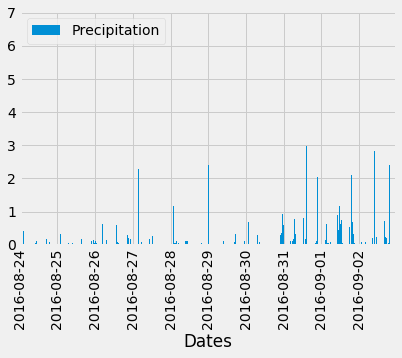

In [96]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#k
date = dt.datetime(2016, 8, 23)

precep = session.query(Measurement.prcp).filter(Measurement.date > date).all()
ptps = list(np.ravel(precep))


dates = session.query(Measurement.date).filter(Measurement.date > date).all()
ptps2 = list(np.ravel(dates))


# Calculate the date 1 year ago from the last data point in the database
#k

# Perform a query to retrieve the data and precipitation scores
#k

# Save the query results as a Pandas DataFrame and set the index to the date column
ptps_df = pd.DataFrame({"Precipitation": ptps, "Dates": ptps2})
ptps_df

ptps_df.set_index("Dates", inplace = True)
ptps_df.head()

# Sort the dataframe by date
#df['Date'] =pd.to_datetime(df.Date) >>> df.sort('Date')
# ptps_df["Dates"] = pd.to_datetime(ptps_df.Date)
# ptps_df.sort("Dates")
ptps_df.sort_values(by="Dates")
# Use Pandas Plotting with Matplotlib to plot the data
ptps_df.plot(kind="bar")
plt.tight_layout
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=10)
plt.show()




In [38]:
ptps_df.head()

,Precipitation
Dates,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [141]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dfmean = ptps_df["Precipitation"].mean()
print(f"The average rainfall is {dfmean}")
dfmode = ptps_df["Precipitation"].mode()
print(f"The mode of rainfall is {dfmode}")
dfmedian = ptps_df["Precipitation"].median()
print(f"The median rainfall amount is {dfmedian}")
dfsem = ptps_df["Precipitation"].sem()
print(f"The SEM is {dfsem}")
dfmax = ptps_df["Precipitation"].max()
print(f"The max rainfall amount is {dfmax}")
dfmin = ptps_df["Precipitation"].min()
print(f"The min rainfall amount is {dfmin}")

The average rainfall is 0.1764615384615388
The mode of rainfall is 0    0.0
dtype: float64
The median rainfall amount is 0.02
The SEM is 0.010253980108219832
The max rainfall amount is 6.7
The min rainfall amount is 0.0


In [142]:
ptps_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# Design a query to show how many stations are available in this dataset?
stationcount = session.query(Station.id).count()
stationcount

9

In [97]:
# letstryit2 = session.query(list(func.count(Measurement.id).label('qty')).filter(Measurement.prcp).group_by(Measurement.prcp).\
# order_by(desc('qty')))
# letstryit2
# session.query(func.count(Measurement.id).label('qty')).filter(Measurement.prcp).group_by(Measurement.prcp).\
# order_by(desc('qty')).all()
# session.query(func.count(Measurement.id)).group_by(Measurement.id).all()
# session.query(Measurement.id).count()
# session.query(Measurement.id).filter(Measurement.id == '1').all()
# session.query(func.count(Measurement.station), Measurement.station).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()


In [98]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# letstryit = session.query(func.count(Measurement.id)).filter(Measurement.prcp).group_by(Measurement.id).\
# order_by(desc(Measurement.prcp)).all()
# letstryit
session.query(func.count(Measurement.station), Measurement.station).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()


[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [55]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# lowtemp = session.query(Measurement.tobs).filter(Measurement.station =="USC00519397").all()
# lowtemp
lowtemp = session.query(func.min(Measurement.tobs)).filter(Measurement.station =="USC00519397").all()
lowtemp

[(56.0)]

In [57]:
hightemp = session.query(func.max(Measurement.tobs)).filter(Measurement.station =="USC00519397").all()
hightemp

[(87.0)]

In [58]:
avgtemp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station =="USC00519397").all()
avgtemp

[(74.55323054331865)]

In [99]:
weird = session.query(func.avg(Measurement.tobs), func.min(Measurement.tobs), func.max(Measurement.tobs)).all()
weird

[(73.09795396419437, 53.0, 87.0)]

In [86]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# session.query(func.count(Measurement.id)).group_by(Measurement.tobs).order_by(desc(Measurement.tobs)).all()
# hist = session.query(func.count(Measurement.tobs)).group_by(Measurement.tobs).order_by(desc(Measurement.station)).all()
# hist
hist = session.query(Measurement.tobs).filter(Measurement.station =="USC00519397").filter(Measurement.date > date).all()
hist
hdates = session.query(Measurement.date).filter(Measurement.station =="USC00519397").filter(Measurement.date > date).all()
hdates

[('2016-08-24'),
 ('2016-08-25'),
 ('2016-08-26'),
 ('2016-08-27'),
 ('2016-08-28'),
 ('2016-08-29'),
 ('2016-08-30'),
 ('2016-08-31'),
 ('2016-09-01'),
 ('2016-09-02'),
 ('2016-09-03'),
 ('2016-09-04'),
 ('2016-09-05'),
 ('2016-09-06'),
 ('2016-09-07'),
 ('2016-09-08'),
 ('2016-09-09'),
 ('2016-09-10'),
 ('2016-09-11'),
 ('2016-09-12'),
 ('2016-09-13'),
 ('2016-09-14'),
 ('2016-09-15'),
 ('2016-09-16'),
 ('2016-09-17'),
 ('2016-09-18'),
 ('2016-09-19'),
 ('2016-09-20'),
 ('2016-09-21'),
 ('2016-09-22'),
 ('2016-09-23'),
 ('2016-09-24'),
 ('2016-09-25'),
 ('2016-09-26'),
 ('2016-09-27'),
 ('2016-09-28'),
 ('2016-09-29'),
 ('2016-09-30'),
 ('2016-10-01'),
 ('2016-10-02'),
 ('2016-10-03'),
 ('2016-10-04'),
 ('2016-10-05'),
 ('2016-10-06'),
 ('2016-10-07'),
 ('2016-10-08'),
 ('2016-10-09'),
 ('2016-10-10'),
 ('2016-10-11'),
 ('2016-10-12'),
 ('2016-10-13'),
 ('2016-10-14'),
 ('2016-10-15'),
 ('2016-10-16'),
 ('2016-10-17'),
 ('2016-10-18'),
 ('2016-10-19'),
 ('2016-10-20'),
 ('2016-10-21'

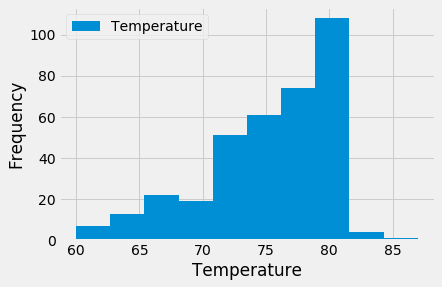

In [88]:
hist2 = list(np.ravel(hist))
hist3 = list(np.ravel(hdates))
hist4_df = pd.DataFrame({"Temperature": hist2, "Dates": hist3})
hist4_df

hist4_df.plot(kind="hist")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
